In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, RFE, f_regression
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, KFold
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LinearRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [12]:
uts = pd.read_csv(r'C:\Users\Lenovo\Documents\Tugas Kuliah\Sems 5\Mesin Learning\UTS\Dataset UTS_Gasal 2425.csv')
uts.head(10000)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,341,83,no,no,8,1960,4,4,1993,new,yes,2366,4016,229,yes,5,35371.3,Basic
9996,21514,5,no,yes,11,91373,1,1,1999,old,no,2584,5266,787,no,3,2153602.9,Basic
9997,1726,89,no,yes,5,73133,7,6,2009,old,yes,9311,1698,218,no,4,176425.9,Basic
9998,44403,29,yes,yes,12,34606,9,4,1990,old,yes,9061,1742,230,no,0,4448474.0,Basic


In [13]:
print("=" * 50)
print("Informasi DataFrame:")
print("=" * 50)
uts.info()
print("\n")

print("=" * 50)
print("Jumlah Nilai Kosong per Kolom:")
print("=" * 50)
print(uts.isnull().sum())
print("\n")

print("=" * 50)
print("Jumlah Total Baris Duplikat:")
print("=" * 50)
print(uts.duplicated().sum())
print("\n")

if uts.duplicated().sum() > 0:
    print("=" * 50)
    print("Detail Baris Duplikat:")
    print("=" * 50)
    print(uts[uts.duplicated()])
else:
    print("=" * 50)
    print("Tidak Ditemukan Baris Duplikat dalam DataFrame.")
    print("=" * 50)

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squaremeters       10000 non-null  int64  
 1   numberofrooms      10000 non-null  int64  
 2   hasyard            10000 non-null  object 
 3   haspool            10000 non-null  object 
 4   floors             10000 non-null  int64  
 5   citycode           10000 non-null  int64  
 6   citypartrange      10000 non-null  int64  
 7   numprevowners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isnewbuilt         10000 non-null  object 
 10  hasstormprotector  10000 non-null  object 
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasstorageroom     10000 non-null  object 
 15  hasguestroom       10000 non-null  int64  
 16  pr

In [14]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

uts.describe()

,squaremeters,numberofrooms,floors,citycode,citypartrange,numprevowners,made,basement,attic,garage,hasguestroom,price
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,49870.13120,50.35840,50.27630,50225.48610,5.51010,5.52170,2005.48850,5033.10390,5028.01060,553.12120,4.99460,4993447.52575
std,28774.37535,28.81670,28.88917,29006.67580,2.87202,2.85667,9.30809,2876.72954,2894.33221,262.05017,3.17641,2877424.10995
min,89.00000,1.00000,1.00000,3.00000,1.00000,1.00000,1990.00000,0.00000,1.00000,100.00000,0.00000,10313.50000
25%,25098.50000,25.00000,25.00000,24693.75000,3.00000,3.00000,1997.00000,2559.75000,2512.00000,327.75000,2.00000,2516401.95000
50%,50105.50000,50.00000,50.00000,50693.00000,5.00000,5.00000,2005.50000,5092.50000,5045.00000,554.00000,5.00000,5016180.30000
75%,74609.75000,75.00000,76.00000,75683.25000,8.00000,8.00000,2014.00000,7511.25000,7540.50000,777.25000,8.00000,7469092.45000
max,99999.00000,100.00000,100.00000,99953.00000,10.00000,10.00000,2021.00000,10000.00000,10000.00000,1000.00000,10.00000,10006771.20000


In [15]:
df_properti = uts.copy()
df_properti.head()
df_properti.columns

Index(['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors',
       'citycode', 'citypartrange', 'numprevowners', 'made', 'isnewbuilt',
       'hasstormprotector', 'basement', 'attic', 'garage', 'hasstorageroom',
       'hasguestroom', 'price', 'category'],
      dtype='object')

In [16]:
X = df_properti.drop(columns=['category', 'price'], axis=1)
y = df_properti['price']

X_trainReg, X_testReg, y_trainReg, y_testReg = train_test_split(X, y, test_size=0.30, random_state=95)
print(f"Shape of X_train: {X_trainReg.shape}")
print(f"Shape of X_test: {X_testReg.shape}")

Shape of X_train: (7000, 16)
Shape of X_test: (3000, 16)


In [17]:
print(X.columns)

Index(['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors',
       'citycode', 'citypartrange', 'numprevowners', 'made', 'isnewbuilt',
       'hasstormprotector', 'basement', 'attic', 'garage', 'hasstorageroom',
       'hasguestroom'],
      dtype='object')


In [18]:
cat_cols=['hasyard', 'haspool', 'isnewbuilt',
          'hasstormprotector', 'hasstorageroom']

transformer = make_column_transformer(
    (OneHotEncoder(), cat_cols),
    remainder='passthrough'
)

X_trainReg_enc = transformer.fit_transform(X_trainReg)
X_testReg_enc = transformer.transform(X_testReg)

df_trainReg_enc = pd.DataFrame(X_trainReg_enc, columns=transformer.get_feature_names_out())
df_testReg_enc = pd.DataFrame(X_testReg_enc, columns=transformer.get_feature_names_out())

df_trainReg_enc.head(10)
df_testReg_enc.head(10)

,onehotencoder__hasyard_no,onehotencoder__hasyard_yes,onehotencoder__haspool_no,onehotencoder__haspool_yes,onehotencoder__isnewbuilt_new,onehotencoder__isnewbuilt_old,onehotencoder__hasstormprotector_no,onehotencoder__hasstormprotector_yes,onehotencoder__hasstorageroom_no,onehotencoder__hasstorageroom_yes,...,remainder__numberofrooms,remainder__floors,remainder__citycode,remainder__citypartrange,remainder__numprevowners,remainder__made,remainder__basement,remainder__attic,remainder__garage,remainder__hasguestroom
0,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,...,87.00000,74.00000,94427.00000,3.00000,6.00000,2002.00000,9076.00000,8573.00000,860.00000,1.00000
1,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,...,12.00000,4.00000,76222.00000,2.00000,3.00000,2009.00000,1987.00000,8788.00000,443.00000,0.00000
2,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,...,47.00000,84.00000,2192.00000,7.00000,9.00000,2006.00000,5620.00000,7860.00000,554.00000,4.00000
3,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,...,86.00000,68.00000,42101.00000,8.00000,6.00000,2005.00000,6355.00000,5668.00000,743.00000,3.00000
4,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,...,92.00000,8.00000,95468.00000,5.00000,7.00000,2002.00000,9655.00000,5678.00000,840.00000,2.00000
5,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,...,41.00000,98.00000,51712.00000,4.00000,1.00000,2004.00000,6907.00000,6416.00000,871.00000,0.00000
6,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,...,33.00000,32.00000,48601.00000,9.00000,1.00000,2012.00000,6833.00000,9708.00000,694.00000,3.00000
7,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,...,54.00000,10.00000,89174.00000,7.00000,10.00000,1999.00000,8930.00000,4203.00000,871.00000,8.00000
8,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,...,4.00000,3.00000,63144.00000,8.00000,2.00000,2002.00000,4238.00000,7147.00000,140.00000,8.00000
9,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,...,17.00000,24.00000,1451.00000,2.00000,1.00000,1995.00000,919.00000,6775.00000,862.00000,10.00000


In [19]:
np.set_printoptions(formatter={'float': '{:.2f}'.format})

print(X_trainReg_enc)

[[1.00 0.00 1.00 ... 8149.00 816.00 3.00]
 [1.00 0.00 0.00 ... 331.00 814.00 2.00]
 [1.00 0.00 0.00 ... 8197.00 173.00 9.00]
 ...
 [1.00 0.00 0.00 ... 7733.00 111.00 10.00]
 [0.00 1.00 1.00 ... 6453.00 130.00 1.00]
 [1.00 0.00 0.00 ... 3497.00 107.00 10.00]]


In [20]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=95)

X_folds = []
y_folds = []

for train_index, test_index in kf.split(X_trainReg_enc):
    X_folds.append((X_trainReg_enc[train_index], X_trainReg_enc[test_index]))
    y_folds.append((y_trainReg.iloc[train_index], y_trainReg.iloc[test_index]))

In [21]:
st_scaler = StandardScaler()
X_trainReg_stscaled = st_scaler.fit_transform(X_trainReg_enc)
X_testReg_stscaled = st_scaler.transform(X_testReg_enc)

selector = SelectKBest(score_func=f_regression, k='all')
X_trainReg_kbest = selector.fit_transform(X_trainReg_stscaled, y_trainReg)
X_testReg_kbest = selector.transform(X_testReg_stscaled)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_trainReg_kbest, y_trainReg)
y_pred_ridge_kbest = ridge_model.predict(X_testReg_kbest)
mse_ridge_kbest = mean_squared_error(y_testReg, y_pred_ridge_kbest)
print("Berhasil")

Berhasil


In [22]:
minmax_scaler = MinMaxScaler()
X_trainReg_mmscaled = minmax_scaler.fit_transform(X_trainReg_enc)
X_testReg_mmscaled = minmax_scaler.transform(X_testReg_enc)

selector = SelectPercentile(score_func=f_regression, percentile=50)
X_trainReg_percentile = selector.fit_transform(X_trainReg_mmscaled, y_trainReg)
X_testReg_percentile = selector.transform(X_testReg_mmscaled)

ridge_model.fit(X_trainReg_percentile, y_trainReg)
y_pred_ridge_percentile = ridge_model.predict(X_testReg_percentile)
mse_ridge_percentile = mean_squared_error(y_testReg, y_pred_ridge_percentile)
print("Berhasil")

Berhasil


In [23]:
svr_kbest_model = SVR()
svr_kbest_model.fit(X_trainReg_kbest, y_trainReg)
y_pred_svr_kbest = svr_kbest_model.predict(X_testReg_kbest)
mse_svr_kbest = mean_squared_error(y_testReg, y_pred_svr_kbest)
print("Berhasil")

Berhasil


In [24]:
svr_percentile_model = SVR()
svr_percentile_model.fit(X_trainReg_percentile, y_trainReg)
y_pred_svr_percentile = svr_percentile_model.predict(X_testReg_percentile)
mse_svr_percentile = mean_squared_error(y_testReg, y_pred_svr_percentile)
print("Berhasil")

Berhasil


In [25]:
results_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE'])

In [26]:
def evaluate_model_with_grid_search(model, params, X_train, y_train, X_test, y_test, model_name):
    kf = KFold(n_splits=5, shuffle=True, random_state=95)

    grid_search = GridSearchCV(model, params, cv=kf, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results_df.loc[len(results_df)] = [model_name, mae, mse, rmse]

    return y_pred, best_model

In [27]:
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
ridge_preds, ridge_best_model = evaluate_model_with_grid_search(
    Ridge(), ridge_params, X_trainReg_kbest, y_trainReg, X_testReg_kbest, y_testReg, 'Ridge Regression'
)

In [28]:
svr_params = {'C': [0.1, 1.0, 10.0], 'epsilon': [0.1, 0.2, 0.5]}
svr_preds, svr_best_model = evaluate_model_with_grid_search(
    SVR(), svr_params, X_trainReg_kbest, y_trainReg, X_testReg_kbest, y_testReg, 'Support Vector Regressor'
)


In [29]:
from sklearn.model_selection import KFold

def evaluate_model_with_grid_search(model, params, X_train, y_train, X_test, y_test, model_name):
    kf = KFold(n_splits=5, shuffle=True, random_state=95)

    grid_search = GridSearchCV(model, params, cv=kf, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results_df.loc[len(results_df)] = [model_name, mae, mse, rmse]

    return y_pred, best_model


In [30]:
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
ridge_preds, ridge_best_model = evaluate_model_with_grid_search(
    Ridge(), ridge_params, X_trainReg_kbest, y_trainReg, X_testReg_kbest, y_testReg, 'Ridge Regression'
)

svr_params = {'C': [0.1, 1.0, 10.0], 'epsilon': [0.1, 0.2, 0.5]}
svr_preds, svr_best_model = evaluate_model_with_grid_search(
    SVR(), svr_params, X_trainReg_kbest, y_trainReg, X_testReg_kbest, y_testReg, 'Support Vector Regressor'
)


In [31]:
print(results_df)

                      Model           MAE                 MSE          RMSE
0          Ridge Regression    1466.48557       3525683.20394    1877.68027
1  Support Vector Regressor 2500856.81968 8371273461984.10352 2893315.30635
2          Ridge Regression    1466.48557       3525683.20394    1877.68027
3  Support Vector Regressor 2500856.81968 8371273461984.10352 2893315.30635


      Actual Price  Ridge Prediction  SVR Prediction  Ridge Difference  \
7592 2232476.20000     2231723.59349   5011208.31508         752.60651   
8738 1523752.90000     1523158.07715   5011092.08200         594.82285   
212  7725844.60000     7729411.24530   5013029.94295       -3566.64530   
9378   28656.50000       28008.43142   5010277.19808         648.06858   
9136  755909.20000      757683.91785   5010789.15990       -1774.71785   

      SVR Difference  
7592  -2778732.11508  
8738  -3487339.18200  
212    2712814.65705  
9378  -4981620.69808  
9136  -4254879.95990  


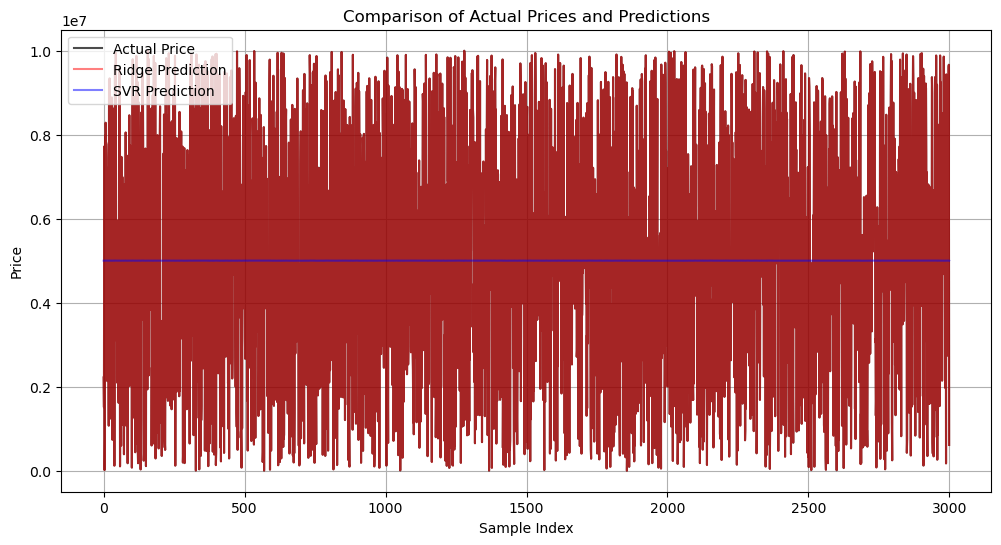

In [32]:
comparison_df = pd.DataFrame({
    'Actual Price': y_testReg,
    'Ridge Prediction': ridge_preds,
    'SVR Prediction': svr_preds,
})


comparison_df['Ridge Difference'] = comparison_df['Actual Price'] - comparison_df['Ridge Prediction']
comparison_df['SVR Difference'] = comparison_df['Actual Price'] - comparison_df['SVR Prediction']

print(comparison_df.head())


plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Actual Price'].values, label='Actual Price', color='black', alpha=0.7)
plt.plot(comparison_df['Ridge Prediction'].values, label='Ridge Prediction', color='red', alpha=0.5)
plt.plot(comparison_df['SVR Prediction'].values, label='SVR Prediction', color='blue', alpha=0.5)
plt.title('Comparison of Actual Prices and Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


Evaluasi Model Berdasarkan MAE, MSE, dan RMSE
1. Mean Absolute Error (MAE)
Ridge Regression: 1,466.49
Support Vector Regressor (SVR): 2,500,856.82
Penjelasan: MAE mengukur rata-rata kesalahan absolut antara prediksi model dan nilai aktual. Ridge Regression memiliki MAE yang jauh lebih rendah daripada SVR (1,466.49 vs. 2,500,856.82), yang menunjukkan bahwa Ridge Regression mampu memberikan prediksi yang lebih dekat dengan nilai aktual rata-rata dibandingkan SVR.

2. Mean Squared Error (MSE)
Ridge Regression: 3,525,683.20
SVR: 8,371,273,461,984.10
Penjelasan: MSE mengukur rata-rata kuadrat kesalahan antara prediksi model dan nilai aktual, memberikan penalti lebih tinggi untuk kesalahan besar. Ridge Regression kembali unggul dengan MSE yang jauh lebih kecil daripada SVR. Nilai MSE yang sangat tinggi pada SVR menunjukkan bahwa model ini menghasilkan kesalahan prediksi yang sangat besar.

3. Root Mean Squared Error (RMSE)
Ridge Regression: 1,877.68
SVR: 2,893,315.31
Penjelasan: RMSE adalah akar kuadrat dari MSE dan memberikan interpretasi yang sama dengan unit target (dalam hal ini, "Price"). Ridge Regression memiliki RMSE yang jauh lebih rendah daripada SVR, yang menunjukkan bahwa Ridge Regression lebih akurat dalam memprediksi harga dibandingkan SVR.

Ridge Regression menghasilkan prediksi yang jauh lebih dekat dengan nilai aktual pada semua contoh data, dengan selisih yang relatif kecil (berkisar antara 594.82 hingga 3,566.65).
SVR menunjukkan perbedaan yang sangat besar dari nilai aktual, dengan selisih prediksi yang mencapai jutaan (misalnya, -4,981,620.70 untuk data dengan harga aktual 28,656.50), menunjukkan bahwa SVR kurang mampu memprediksi harga secara akurat.

Kesimpulan
Ridge Regression adalah model yang lebih baik untuk memprediksi harga dalam dataset ini karena memiliki:

MAE, MSE, dan RMSE yang jauh lebih rendah, menunjukkan kesalahan prediksi yang lebih kecil.
Perbedaan prediksi yang konsisten lebih kecil terhadap harga aktual dibandingkan SVR.
Dengan demikian, **Ridge Regression **direkomendasikan sebagai model terbaik untuk prediksi harga dalam dataset ini.